In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [333]:
conda info --envs

# conda environments:
Note: you may need to restart the kernel to use updated packages.

#
base                  *  D:\SOFTWARE\ANACONDA
Podcast-downloader       D:\SOFTWARE\ANACONDA\envs\Podcast-downloader
cricenv                  D:\SOFTWARE\ANACONDA\envs\cricenv



In [310]:
merged_df =pd.read_csv('merged_final_encoded.csv')


## Missing Value

In [197]:
print(merged_df[merged_df['Position'] == '0']['Name'].unique())
merged_df[merged_df['Position'] == '0'].sort_values('Season', ascending=False)['Name'].unique()

['David Hussey' 'RP Singh' 'Dwaraka Ravi Teja' 'Scott Styris'
 'Herschelle Gibbs' 'Shahid Afridi' 'Adam Gilchrist' 'Mohammad Asif'
 'Glenn McGrath' 'Tillakaratne Dilshan' 'Paidikalva Vijaykumar'
 'PM Sarvesh Kumar' 'Salman Butt' 'Rohan Raje' 'Rajesh Pawar'
 'Shaun Pollock' 'Farveez Maharoof' 'Ajit Agarkar' 'Laxmi Shukla'
 'Mohammad Hafeez' 'Sourav Ganguly' 'Aakash Chopra' 'Shoaib Akhtar'
 'James Hopes' 'Dominic Thornely' 'Sachin Tendulkar' 'Sanath Jayasuriya'
 'Muthiah Muralidaran' 'Ramesh Powar' 'Siddharth Trivedi' 'Mahesh Rawat'
 'Kamran Akmal' 'Kumar Sangakkara' 'Niraj Patel' 'Mohammad Kaif'
 'Wilkin Mota' 'Sreesanth' 'Vikram Singh' 'Younis Khan' 'Dilhara Fernando'
 'Pinal Shah' 'Abdur Razzak' 'Anil Kumble' 'Devraj Patil' 'Rahul Dravid'
 'Chamara Silva' 'Halhadar Das' 'Nuwan Zoysa' 'Joginder Sharma'
 'Cameron White' 'Misbah ul Haq' 'Mahela Jayawardene' 'Shoaib Malik'
 'Jagadeesh Arunkumar' 'Sohail Tanvir' 'Shane Warne' 'Swapnil Asnodkar'
 'Graeme Smith' 'Uday Kaul' 'Chamara Kapugede

array(['James Pattinson', 'Mujeeb Ur Rahman', 'AB de Villiers',
       'Chris Morris', 'Ben Stokes', '0', 'Monu Kumar', 'Chris Gayle',
       'Josh Philippe', 'Nikhil Naik', 'Suresh Raina', 'Ish Sodhi',
       'Colin de Grandhomme', 'Siddhesh Lad', 'Sudhesan Midhun',
       'Scott Kuggeleijn', 'Prithvi Raj', 'Liam Plunkett', 'D Arcy Short',
       'Javon Searles', 'Jean Paul Duminy', 'Junior Dala', 'Vinay Kumar',
       'Lendl Simmons', 'Marlon Samuels', 'Sreenath Aravind',
       'Hashim Amla', 'Ankit Soni', 'Ankit Bawne', 'Shubham Agarwal',
       'Iqbal Abdulla', 'Usman Khawaja', 'Parvez Rasool', 'RP Singh',
       'Tabraiz Shamsi', 'Azhar Mahmood', 'Ishwar Pandey',
       'Marchant de Lange', 'Ryan ten Doeschate', 'Rusty Theron',
       'Abu Nechim', 'Rilee Rossouw', 'Domnic Muthuswami',
       'Chidhambaram Gautam', 'Daren Sammy', 'David Hussey',
       'Muthiah Muralidaran', 'Krishmar Santokie', 'Laxmi Shukla',
       'Siddharth Trivedi', 'Biplab Samantray', 'Rahul Dravid',
     

In [198]:
Batsman= ['David Hussey', 'Dwaraka Ravi Teja', 'Herschelle Gibbs', 'Salman Butt', 'Sourav Ganguly', 'Aakash Chopra', 'Halhadar Das', 'Mohammad Hafeez', 'Muthiah Muralidaran', 'Ramesh Powar', 'Mahesh Rawat', 'Kumar Sangakkara', 'Niraj Patel', 'Mohammad Kaif', 'Uday Kaul', 'Chamara Kapugedera', 'Palani Amarnath', 'Karan Goel', 'S Badrinath', 'Suresh Raina', 'Ramnaresh Sarwan', 'Taruwar Kohli', 'Roelof van der Merwe', 'Morne van Wyk', 'Rob Quiney', 'Jean Paul Duminy', 'Arjun Yadav', 'VVS Laxman', 'Wasim Jaffer', 'Bharat Chipli', 'Abhinav Mukund', 'Taruwar Kohli', 'Gagandeep Singh', 'Sunny Singh', 'Arindam Ghosh', 'Chandan Madan', 'Paul Collingwood', 'KP Appanna', 'Sourav Sarkar', 'Rahil Shaikh', 'Aavishkar Salvi', 'Azhar Bilakhia', 'Mohnish Mishra', 'Yashpal Singh', 'Shivnarine Chanderpaul', 'Andrew McDonald', 'Ranadeb Bose', 'Justin Kemp', 'Harpreet Singh', 'Mohnish Mishra', 'Amit Uniyal', 'Chandan Madan', 'Bodapati Sumanth', 'Richard Levi', 'Ben Rohrer', 'Udit Birla', 'Lendl Simmons', 'Rilee Rossouw', 'Usman Khawaja', 'Hashim Amla', 'Ankit Bawne', 'Shubham Agarwal', 'Arcy Short', 'Siddhesh Lad', 'Josh Philippe']
# All Rounder = ['Scott Styris', 'Shahid Afridi', 'Farveez Maharoof', 'Laxmi Shukla', 'Sanath Jayasuriya', 'Chamara Silva', 'Dominic Thornely', 'Shoaib Malik', 'Yo Mahesh', 'Iqbal Abdulla', 'Chaminda Vaas', 'Dimitri Mascarenhas', 'Andrew Symonds', 'Daniel Vettori', 'Ashley Noffke', 'Andrew McDonald', 'Robin Peterson', 'Luke Wright', 'Doug Bracewell', 'Luke Wright', 'Raju Bhatkal', 'Clint McKay', 'Doug Bollinger', 'Yusuf Abdulla', 'Ryan Harris', 'Krishnakant Upadhyay', 'Chidhambaram Gautam', 'Ben Rohrer', 'Sunny Gupta', 'Parvez Rasool', 'Michael Neser', 'Ishwar Pandey', 'Javon Searles', 'Siddhesh Lad', 'Scott Kuggeleijn', 
#                'Nathan Coulter Nile','Raj Bawa']
Bowler = ['RP Singh', 'Mohammad Asif', 'Glenn McGrath', 'Paidikalva Vijaykumar',
               'PM Sarvesh Kumar', 'Rohan Raje', 'Rajesh Pawar', 'Ajit Agarkar',
               'Sreesanth', 'Siddharth Trivedi', 'Muthiah Muralidaran', 'Ramesh Powar',
               'Charl Langeveldt', 'Thilan Thushara', 'Mashrafe Mortaza', 'Dillon du Preez',
               'Ryan Harris', 'Abdur Razzak', 'Anil Kumble', 'Raiphi Gomez', 'Bhargav Bhatt',
               'Johan van der Wath', 'Nathan Rimmington', 'Nuwan Kulasekara', 'Doug Bracewell',
               'Marchant de Lange', 'Ajit Chandila', 'Clint McKay', 'Krishnakant Upadhyay',
               'Sunny Gupta', 'Parvez Rasool', 'Sachithra Senanayake', 'Krishmar Santokie',
               'Ishwar Pandey', 'Tabraiz Shamsi', 'Mujeeb Ur Rahman', 'James Pattinson',
               'Prithvi Raj', 'Monu Kumar']

merged_df.loc[merged_df['Name'].isin(Batsman), 'Position'] = 'Batsman'
# merged_df.loc[merged_df['Name'].isin(All Rounder), 'Position'] = 'All Rounder'
merged_df.loc[merged_df['Name'].isin(Bowler), 'Position'] = 'Bowler'
merged_df.loc[merged_df['Name'] == 'Nathan Coulter Nile', 'Age'] = '35y 187d'
merged_df['Position'] = merged_df['Position'].replace({'Top order Batter': 'Batsmen',
    'Middle order Batter': 'Batsmen','Wicketkeeper Batter' :'Batsmen','Bowling Allrounder':'All Rounder', 'Batting Allrounder':'All Rounder'})

In [199]:
merged_df['Position'] = merged_df['Position'].replace({'All-Rounder': 'All Rounder','Opening Batter':'Batsman', 'Allrounder':'All Rounder', 'Batter':'Batsman', '0': 'All Rounder', 'Batsmen':'Batsman', 'Wicketkeeper':'Wicket Keeper'})


In [200]:
merged_df.Position.unique()

array(['Batsman', 'Bowler', 'All Rounder', 'Wicket Keeper'], dtype=object)

In [312]:
merged_df.head(30)

,Match_Id,Season,Date,PlayOffs,Name,Position,Team,Opponent,Venue,TossWinner,...,Wickets_Roll_5_median,Econ_Roll_5_median,Dots_Roll_5_median,Fours_Roll_5_median,Sixes_Roll_5_median,Wd_Roll_5_median,Nb_Roll_5_median,Balls_bowled_Roll_5_median,Catches_Roll_5_median,total_points_Roll_5_median
0,335985,2008,2008-04-20,0,430,0,17,11,32,11,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,335985,2008,2008-04-20,0,564,0,17,11,32,11,...,0.0,4.33,2.0,0.0,1.0,0.0,0.0,9.0,0.0,6.5
2,335985,2008,2008-04-20,0,643,2,17,11,32,11,...,0.0,8.66,4.0,0.0,2.0,0.0,0.0,18.0,0.0,7.0
3,335985,2008,2008-04-20,0,419,2,17,11,32,11,...,0.0,9.08,6.0,1.5,2.0,0.0,0.0,21.0,0.0,19.5
4,335985,2008,2008-04-20,0,85,0,17,11,32,11,...,0.0,8.66,4.0,0.0,2.0,0.0,0.0,18.0,0.0,7.0
5,335985,2008,2008-04-20,0,323,0,17,11,32,11,...,0.0,8.66,4.0,0.0,2.0,0.0,0.0,18.0,0.0,12.0
6,335985,2008,2008-04-20,0,623,1,17,11,32,11,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
7,335985,2008,2008-04-20,0,223,0,17,11,32,11,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
8,335985,2008,2008-04-20,0,622,0,17,11,32,11,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5
9,335986,2008,2008-04-20,0,499,0,2,9,15,2,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


In [201]:

# def starts_with_number(s):
#     try:
#         # Try converting the first character of the string to an integer
#         int(s[0])
#         return 0
#     except ValueError:
#         return 1

# # Apply the function to the 'Match No.' column and create a new column 'Starts with Number'
# merged_df['PlayOffs'] = merged_df['Match No.'].apply(starts_with_number)
match_dict = {'Qualifier 1 (N)': 1, 'Eliminator (N)': 2, 'Qualifier 2 (N)': 3, 'Final (N)': 4,'Final (D/N)':4, '2nd Qualifying Final (N)':1, 'Elimination Final (N)':2 }
match_num=0

for i,match_type in enumerate(merged_df["Match No."]):
    
    if match_type in match_dict:
        match_num += match_dict[match_type]
    else:
        
        match_str = re.findall('\d+', match_type)[0]
        match_num = int(match_str)

    merged_df.loc[merged_df['Match No.'] == match_type, 'Match Num'] = match_num


In [17]:
merged_df.isnull().sum()

Match_Id                          0
Season                            0
Date                              0
PlayOffs                          0
Name                              0
Position                          0
Team                              0
Opponent                          0
Venue                             0
TossWinner                        0
TossDecision                      0
Runs                              0
Balls                             0
4s                                0
6s                                0
SR                                0
Maidens                           0
Runs_conceded                     0
Wickets                           0
Econ                              0
Dots                              0
Fours                             0
Sixes                             0
Wd                                0
Nb                                0
Balls_bowled                      0
Catches                           0
WinningTeam                 

In [22]:
merged_df.isnull().sum()

Match_Id                         0
Season                           0
Date                             0
PlayOffs                         0
Name                             0
Position                         0
Team                             0
Opponent                         0
Venue                            0
TossWinner                       0
TossDecision                     0
Runs                             0
Balls                            0
4s                               0
6s                               0
SR                               0
Maidens                          0
Runs_conceded                    0
Wickets                          0
Econ                             0
Dots                             0
Fours                            0
Sixes                            0
Wd                               0
Nb                               0
Balls_bowled                     0
Catches                          0
WinningTeam                      0
WonBy               

In [18]:
print(merged_df[merged_df.WinningTeam.isnull()].Match_Id.unique())
# merged_df.dropna(subset=['WinningTeam'], inplace=True)
# merged_df.isnull().sum()

[]


In [309]:
# merged_df.drop(columns=['Age'], axis=1, inplace =True)
merged_df.head(30)

,Match_Id,Season,Date,PlayOffs,Name,Position,Team,Opponent,Venue,TossWinner,...,Wickets_Roll_5_median,Econ_Roll_5_median,Dots_Roll_5_median,Fours_Roll_5_median,Sixes_Roll_5_median,Wd_Roll_5_median,Nb_Roll_5_median,Balls_bowled_Roll_5_median,Catches_Roll_5_median,total_points_Roll_5_median
79,335985,2008,2008-04-20,0,430,0,17,11,32,11,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
80,335985,2008,2008-04-20,0,564,0,17,11,32,11,...,0.0,4.33,2.0,0.0,1.0,0.0,0.0,9.0,0.0,6.5
81,335985,2008,2008-04-20,0,643,2,17,11,32,11,...,0.0,8.66,4.0,0.0,2.0,0.0,0.0,18.0,0.0,7.0
82,335985,2008,2008-04-20,0,419,2,17,11,32,11,...,0.0,9.08,6.0,1.5,2.0,0.0,0.0,21.0,0.0,19.5
83,335985,2008,2008-04-20,0,85,0,17,11,32,11,...,0.0,8.66,4.0,0.0,2.0,0.0,0.0,18.0,0.0,7.0
84,335985,2008,2008-04-20,0,323,0,17,11,32,11,...,0.0,8.66,4.0,0.0,2.0,0.0,0.0,18.0,0.0,12.0
85,335985,2008,2008-04-20,0,623,1,17,11,32,11,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
86,335985,2008,2008-04-20,0,223,0,17,11,32,11,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
87,335985,2008,2008-04-20,0,622,0,17,11,32,11,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5
88,335986,2008,2008-04-20,0,499,0,2,9,15,2,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


### Filling Player of the match column as few rows were empty

In [19]:
# Find the name with max total points among the winning teams
# Get the list of winning teams
df = merged_df
null_player_of_match = df['Player_of_Match'].isnull()
df1= df[null_player_of_match]
winning_teams = df1[df1['WinningTeam'] == df1['Team']]['WinningTeam']

# Group by 'Match_Id' and find the row with maximum 'total_points' within each group
max_total_points_index = df1[df1['Team'] == df1['WinningTeam']].groupby('Match_Id')['total_points'].idxmax()

# Access the original DataFrame using the index to get the entire row
max_total_points_row = df1.loc[max_total_points_index]
# print(max_total_points_row['Match_Id'])
# Get the name with maximum total points from the 'Name' column
max_total_points_name = max_total_points_row['Name']
max_total_points_id = max_total_points_row['Match_Id']
# # Fill the null values in 'Player_of_Match' column with the max total points name
df0 = pd.DataFrame({'Match_Id':max_total_points_row['Match_Id'],'Player_of_Match': max_total_points_row['Name']} )
# Merge df1 and df2 on 'Match_Id'
merged_df = merged_df.merge(df0, on='Match_Id', how='left')

# Replace missing values in 'Player_of_Match_x' column with values from 'Player_of_Match_y' column
merged_df['Player_of_Match_x'].fillna(merged_df['Player_of_Match_y'], inplace=True)

# Drop the 'Player_of_Match_y' column
merged_df.drop('Player_of_Match_y', axis=1, inplace=True)

# Rename the 'Player_of_Match_x' column to 'Player_of_Match'
merged_df.rename(columns={'Player_of_Match_x': 'Player_of_Match'}, inplace=True)
merged_df.Player_of_Match

0        106.0
1        106.0
2        106.0
3        106.0
4        106.0
         ...  
19487    200.0
19488    200.0
19489    200.0
19490    200.0
19491    200.0
Name: Player_of_Match, Length: 19492, dtype: float64

In [391]:
df = pd.read_csv("merged_all_encoded2.csv")
df.Player_of_Match

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
19488    200.0
19489    200.0
19490    200.0
19491    200.0
19492    200.0
Name: Player_of_Match, Length: 19493, dtype: float64

In [392]:
df = df.set_index('Match_Id')
df0 = df0.set_index('Match_Id')

merged_df = df.combine_first(df0)
merged_df


,4s,4s_Roll_5_median,6s,6s_Roll_5_median,Balls,Balls_Roll_5_median,Balls_bowled,Balls_bowled_Roll_5_median,Catches,Catches_Roll_5_median,...,Wicket_taking_Ability,Wickets,Wickets_Roll_5_median,WinningTeam,WonBy,batting_points,bowling_points,fielding_points,total_points,total_points_Roll_5_median
Match_Id,,,,,,,,,,,,,,,,,,,,,
335982,0,NaN,0,NaN,10,NaN,6,NaN,1,NaN,...,0.0,0,NaN,9,2,8,0,8,16,NaN
335982,0,NaN,1,NaN,7,NaN,24,NaN,1,NaN,...,24.0,1,NaN,9,2,14,21,8,43,NaN
335982,0,NaN,0,NaN,5,NaN,0,NaN,0,NaN,...,0.0,0,NaN,9,2,5,0,0,5,NaN
335982,0,NaN,0,NaN,16,NaN,0,NaN,0,NaN,...,0.0,0,NaN,9,2,4,0,0,4,NaN
335982,0,NaN,0,NaN,3,NaN,0,NaN,0,NaN,...,0.0,0,NaN,9,2,6,0,0,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312200,2,0.0,0,0.0,11,3.0,0,0.0,0,1.0,...,0.0,0,0.0,6,1,20,0,0,20,13.0
1312200,5,0.0,0,0.0,35,12.0,0,0.0,0,1.0,...,0.0,0,0.0,6,1,52,0,0,52,40.0
1312200,1,1.0,2,2.0,16,13.0,0,0.0,1,0.0,...,0.0,0,0.0,6,1,33,0,8,41,34.0


In [396]:
merged_df

,4s,4s_Roll_5_median,6s,6s_Roll_5_median,Balls,Balls_Roll_5_median,Balls_bowled,Balls_bowled_Roll_5_median,Catches,Catches_Roll_5_median,...,Wicket_taking_Ability,Wickets,Wickets_Roll_5_median,WinningTeam,WonBy,batting_points,bowling_points,fielding_points,total_points,total_points_Roll_5_median
Match_Id,,,,,,,,,,,,,,,,,,,,,
335982,0,NaN,0,NaN,10,NaN,6,NaN,1,NaN,...,0.0,0,NaN,9,2,8,0,8,16,NaN
335982,0,NaN,1,NaN,7,NaN,24,NaN,1,NaN,...,24.0,1,NaN,9,2,14,21,8,43,NaN
335982,0,NaN,0,NaN,5,NaN,0,NaN,0,NaN,...,0.0,0,NaN,9,2,5,0,0,5,NaN
335982,0,NaN,0,NaN,16,NaN,0,NaN,0,NaN,...,0.0,0,NaN,9,2,4,0,0,4,NaN
335982,0,NaN,0,NaN,3,NaN,0,NaN,0,NaN,...,0.0,0,NaN,9,2,6,0,0,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312200,2,0.0,0,0.0,11,3.0,0,0.0,0,1.0,...,0.0,0,0.0,6,1,20,0,0,20,13.0
1312200,5,0.0,0,0.0,35,12.0,0,0.0,0,1.0,...,0.0,0,0.0,6,1,52,0,0,52,40.0
1312200,1,1.0,2,2.0,16,13.0,0,0.0,1,0.0,...,0.0,0,0.0,6,1,33,0,8,41,34.0


In [21]:
# merged_df.to_csv('merged_all_encoded2.csv', index=False)

In [301]:
max_total_points_name

81       643
109      145
112      517
148      624
173      330
        ... 
19397    203
19425    146
19448    439
19453    252
19477    200
Name: Name, Length: 883, dtype: int32

In [300]:
print(merged_df[merged_df['Match_Id'].isin([335982, 335985,335985, 335986, 335990])].Player_of_Match)

79       NaN
80       NaN
81     643.0
82       NaN
83       NaN
84       NaN
85       NaN
86       NaN
87       NaN
88       NaN
89       NaN
90       NaN
98       NaN
99       NaN
100      NaN
101      NaN
102      NaN
103      NaN
104      NaN
105      NaN
106      NaN
107      NaN
108      NaN
109    145.0
176      NaN
177      NaN
178      NaN
179      NaN
180      NaN
181      NaN
182      NaN
183      NaN
184      NaN
185      NaN
186      NaN
187    640.0
188      NaN
189      NaN
190      NaN
191      NaN
192      NaN
193      NaN
194      NaN
195      NaN
196      NaN
197      NaN
Name: Player_of_Match, dtype: float64


In [212]:
df4.head(30)

,Match_Id,Name,Team,WinningTeam
854,335982,Brendon McCullum,Kolkata Knight Riders,Kolkata Knight Riders
871,335983,Michael Hussey,Chennai Super Kings,Chennai Super Kings
800,335984,Gautam Gambhir,Delhi Daredevils,Delhi Daredevils
930,335985,Zaheer Khan,Royal Challengers Bangalore,Royal Challengers Bangalore
956,335986,David Hussey,Kolkata Knight Riders,Kolkata Knight Riders
886,335987,Shane Warne,Rajasthan Royals,Rajasthan Royals
911,335988,Virender Sehwag,Delhi Daredevils,Delhi Daredevils
900,335989,Matthew Hayden,Chennai Super Kings,Chennai Super Kings
706,335990,Yusuf Pathan,Rajasthan Royals,Rajasthan Royals
655,335991,Kumar Sangakkara,Kings XI Punjab,Kings XI Punjab


In [96]:
def find_player(merged_df, name, team, match_id):
    group = merged_df[merged_df['Match_ID'] == match_id]
    for player in group[group['Team'] == team]['Name']:
        if name in player:
            return player
    return None
for index,desc in enumerate(merged_df["Desc"]):
    if(desc.startswith('c & b')):
        name = desc.split(" & b ")[1].strip('†')
        player = find_player(merged_df,name, merged_df.iloc[index]['Opponent'], merged_df.iloc[index]['Match_Id'])
        merged_df.loc[index, 'Fielder'] = player
    elif(desc.startswith('c')):
        name = desc.split(' ')[1].strip('†')
        if name != 'sub':
            player = find_player(merged_df,name, merged_df.iloc[index]['Opponent'], merged_df.iloc[index]['Match_Id'])
            merged_df.loc[index, 'Fielder'] = player
    elif(desc.startswith('st')):
        name = desc.split(' ')[1].strip('†')
        player = find_player(merged_df,name, merged_df.iloc[index]['Opponent'], merged_df.iloc[index]['Match_Id'])
        batsmen_df.loc[index, 'Fielder'] = player
    elif(desc.startswith('run out')):
        name = desc.split('run out (')[1].split(')')[0].split('/')
        if len(name) == 1:
            player = find_player(merged_df,name[0], merged_df.iloc[index]['Opponent'], merged_df.iloc[index]['Match_Id'])
            merged_df.loc[index, 'Fielder'] = player
        elif len(name) == 2:
            player1 = find_player(merged_df,name[0], merged_df.iloc[index]['Opponent'], merged_df.iloc[index]['Match_Id'])
            merged_df.loc[index, 'Fielder'] = player
    else:
        merged_df.loc[index, 'Fielder'] = '0'

KeyError: 'Match_ID'

In [247]:

merged_df.columns

Index([], dtype='object')

## Rolling Function

In [225]:
merged_df = merged_df.sort_values(by=['Match_Id', 'Season'], ascending=True)
merged_df.to_csv("merged_all_2008-2022.csv", index =False)

In [227]:
merged_df= pd.read_csv("merged_all_2008-2022.csv")
merged_df

,Match_Id,Match No.,Name,Team,Opponent,Venue,Position,Desc,Runs,Balls,...,TossWinner,TossDecision,WinningTeam,WonBy,Margin,Player_of_Match,Season,PlayOffs,Match Num,Dismissal
0,335982,1st match (N),Cameron White,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,All Rounder,c Saha b Agarkar,6,10,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,BB McCullum,2008,0,1,Caught
1,335982,1st match (N),Jacques Kallis,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,All Rounder,c Kartik b Agarkar,8,7,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,BB McCullum,2008,0,1,Caught
2,335982,1st match (N),Virat Kohli,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,Batsman,b Dinda,1,5,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,BB McCullum,2008,0,1,Bowled
3,335982,1st match (N),Wasim Jaffer,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,Batsman,c Ponting b Dinda,6,16,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,BB McCullum,2008,0,1,Caught
4,335982,1st match (N),Rahul Dravid,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,All Rounder,b Sharma,2,3,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,BB McCullum,2008,0,1,Bowled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19488,1312200,Final (N),Sanju Samson,Rajasthan Royals,Gujarat Titans,Ahmedabad,Batsman,c Sai Kishore b Pandya,14,11,...,Rajasthan Royals,bat,Gujarat Titans,Wickets,7.0,Hardik Pandya,2022,1,29,Caught
19489,1312200,Final (N),Jos Buttler,Rajasthan Royals,Gujarat Titans,Ahmedabad,Batsman,c †Saha b Pandya,39,35,...,Rajasthan Royals,bat,Gujarat Titans,Wickets,7.0,Hardik Pandya,2022,1,29,Caught
19490,1312200,Final (N),Yashasvi Jaiswal,Rajasthan Royals,Gujarat Titans,Ahmedabad,Batsman,c Sai Kishore b Yash Dayal,22,16,...,Rajasthan Royals,bat,Gujarat Titans,Wickets,7.0,Hardik Pandya,2022,1,29,Caught
19491,1312200,Final (N),Prasidh Krishna,Rajasthan Royals,Gujarat Titans,Ahmedabad,Bowler,not out,0,0,...,Rajasthan Royals,bat,Gujarat Titans,Wickets,7.0,Hardik Pandya,2022,1,29,Not out


In [5]:
rolling_cols = ['Runs', 'Balls', '4s', '6s',  'SR', 'Maidens', 'Runs_conceded', 'Wickets', 'Econ', 'Dots', 'Fours', 'Sixes', 'Wd', 'Nb', 'Balls_bowled', 'Catches', 'Runs', 'Runs_conceded', 'bowling_points', 'batting_points',
       'fielding_points',  'total_points']

# define window size and minimum periods
window_size = [3,5]
min_periods = 1

# apply rolling functions and create new columns for each
for col in rolling_cols:
    merged_df[f"{col}_Roll_{window_size[0]}_mean"] = merged_df.groupby("Name")[col].shift().rolling(window_size[0], min_periods=min_periods).mean().astype(float).round(2)
    merged_df[f"{col}_Roll_{window_size[1]}_mean"] = merged_df.groupby("Name")[col].shift().rolling(window_size[1], min_periods=min_periods).mean().astype(float).round(2)

In [7]:
# merged_df.to_csv("merged_roll5.csv", index =False)
# merged_df= pd.read_csv("merged_roll5.csv")
merged_df.to_csv('final_merged_2.csv')

In [3]:
merged_df= pd.read_csv("merged_final_encoded.csv")
merged_df.columns

Index(['Match_Id', 'Season', 'Date', 'PlayOffs', 'Name', 'Position', 'Team',
       'Opponent', 'Venue', 'TossWinner', 'TossDecision', 'Runs', 'Balls',
       '4s', '6s', 'SR', 'Maidens', 'Runs_conceded', 'Wickets', 'Econ', 'Dots',
       'Fours', 'Sixes', 'Wd', 'Nb', 'Balls_bowled', 'Catches', 'WinningTeam',
       'WonBy', 'Margin', 'Dismissal', 'Player_of_Match',
       'Hard Hitting ability', 'Running between wickets',
       'Wicket_taking_Ability', 'Consistency', 'batting_points',
       'fielding_points', 'bowling_points', 'total_points',
       'Runs_Roll_5_median', 'Balls_Roll_5_median', '4s_Roll_5_median',
       '6s_Roll_5_median', 'SR_Roll_5_median', 'Maidens_Roll_5_median',
       'Runs_conceded_Roll_5_median', 'Wickets_Roll_5_median',
       'Econ_Roll_5_median', 'Dots_Roll_5_median', 'Fours_Roll_5_median',
       'Sixes_Roll_5_median', 'Wd_Roll_5_median', 'Nb_Roll_5_median',
       'Balls_bowled_Roll_5_median', 'Catches_Roll_5_median',
       'total_points_Roll_5_median'

In [4]:
merged_df

,Match_Id,Season,Date,PlayOffs,Name,Position,Team,Opponent,Venue,TossWinner,...,Wickets_Roll_5_median,Econ_Roll_5_median,Dots_Roll_5_median,Fours_Roll_5_median,Sixes_Roll_5_median,Wd_Roll_5_median,Nb_Roll_5_median,Balls_bowled_Roll_5_median,Catches_Roll_5_median,total_points_Roll_5_median
0,335985,2008,2008-04-20,0,430,0,17,11,32,11,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,335985,2008,2008-04-20,0,564,0,17,11,32,11,...,0.0,4.33,2.0,0.0,1.0,0.0,0.0,9.0,0.0,6.5
2,335985,2008,2008-04-20,0,643,2,17,11,32,11,...,0.0,8.66,4.0,0.0,2.0,0.0,0.0,18.0,0.0,7.0
3,335985,2008,2008-04-20,0,419,2,17,11,32,11,...,0.0,9.08,6.0,1.5,2.0,0.0,0.0,21.0,0.0,19.5
4,335985,2008,2008-04-20,0,85,0,17,11,32,11,...,0.0,8.66,4.0,0.0,2.0,0.0,0.0,18.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19401,1312200,2022,2022-05-29,1,501,1,14,6,1,14,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0
19402,1312200,2022,2022-05-29,1,252,1,14,6,1,14,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0
19403,1312200,2022,2022-05-29,1,633,1,14,6,1,14,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
19404,1312200,2022,2022-05-29,1,417,2,14,6,1,14,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0


## Encoding

In [5]:
# merged_df.dtypes == 'object'
object_cols = merged_df.select_dtypes(include='object').columns
for col in object_cols:
    print(col)

Match No.
Name
Team
Opponent
Venue
Position
Desc
Date
TossWinner
TossDecision
WinningTeam
WonBy
Player_of_Match
Dismissal


In [6]:
le = LabelEncoder()
label_encoding_df = pd.DataFrame()
# Loop through each feature and apply label encoding and decoding
features_to_encode =['Name','Team','Opponent', 'Venue', 'Position','Dismissal', 'TossWinner', 'TossDecision',
       'WinningTeam', 'WonBy', 'PlayOffs']
for feature in features_to_encode:
    # Encode the feature
    label_encoding_df[feature] = merged_df[feature]
    merged_df[feature] = le.fit_transform(merged_df[feature])

    label_encoding_df[feature + '_encoded'] = merged_df[feature]
    # Decode the encoded feature
label_encoding_df['Player_of_Match'] = merged_df['Player_of_Match']
name_encoding_dict = label_encoding_df.set_index('Name')['Name_encoded'].to_dict()
merged_df['Player_of_Match'] = merged_df['Player_of_Match'].map(name_encoding_dict)
label_encoding_df['Player_of_Match_encoded'] = merged_df['Player_of_Match']
# Display the original DataFrame with encoded and decoded labels
print(label_encoding_df)

                   Name  Name_encoded                         Team  \
0         Cameron White           110  Royal Challengers Bangalore   
1        Jacques Kallis           223  Royal Challengers Bangalore   
2           Virat Kohli           623  Royal Challengers Bangalore   
3          Wasim Jaffer           628  Royal Challengers Bangalore   
4          Rahul Dravid           430  Royal Challengers Bangalore   
...                 ...           ...                          ...   
19488      Sanju Samson           501             Rajasthan Royals   
19489       Jos Buttler           252             Rajasthan Royals   
19490  Yashasvi Jaiswal           633             Rajasthan Royals   
19491   Prasidh Krishna           417             Rajasthan Royals   
19492    Mohammed Shami           352               Gujarat Titans   

       Team_encoded               Opponent  Opponent_encoded       Venue  \
0                17  Kolkata Knight Riders                 9   Bengaluru   
1      

In [9]:
merged_df[merged_df.Team == 0]
merged_df.drop(merged_df[merged_df['Team'] == 0].index, inplace=True)


In [10]:
label_encoding_df['TossWinner_encoded']=label_encoding_df['TossWinner_encoded']+1
merged_df['TossWinner']=merged_df['TossWinner']+1
label_encoding_df['WinningTeam_encoded']=label_encoding_df['WinningTeam_encoded']+1
merged_df['WinningTeam']=merged_df['WinningTeam']+1

In [11]:
merged_df.columns

Index(['Match_Id', 'Match No.', 'Name', 'Team', 'Opponent', 'Venue',
       'Position', 'Desc', 'Runs', 'Balls', '4s', '6s', 'SR', 'Overs',
       'Maidens', 'Runs_conceded', 'Wickets', 'Econ', 'Dots', 'Fours', 'Sixes',
       'Wd', 'Nb', 'Balls_bowled', 'Catches', 'Hard Hitting ability',
       'Running between wickets', 'Wicket_taking_Ability', 'Consistency',
       'batting_points', 'fielding_points', 'bowling_points', 'total_points',
       'Date', 'TossWinner', 'TossDecision', 'WinningTeam', 'WonBy', 'Margin',
       'Player_of_Match', 'Season', 'PlayOffs', 'Match Num', 'Dismissal',
       'Runs_Roll_5_median', 'Balls_Roll_5_median', '4s_Roll_5_median',
       '6s_Roll_5_median', 'SR_Roll_5_median', 'Maidens_Roll_5_median',
       'Runs_conceded_Roll_5_median', 'Wickets_Roll_5_median',
       'Econ_Roll_5_median', 'Dots_Roll_5_median', 'Fours_Roll_5_median',
       'Sixes_Roll_5_median', 'Wd_Roll_5_median', 'Nb_Roll_5_median',
       'Balls_bowled_Roll_5_median', 'Catches_Roll_5_m

In [12]:
selected_columns = merged_df[['Team', 'Opponent', 'TossWinner', 'TossDecision', 'WinningTeam']]
print(selected_columns)


       Team  Opponent  TossWinner  TossDecision  WinningTeam
0        17         9          17             1            9
1        17         9          17             1            9
2        17         9          17             1            9
3        17         9          17             1            9
4        17         9          17             1            9
...     ...       ...         ...           ...          ...
19488    14         6          14             0            6
19489    14         6          14             0            6
19490    14         6          14             0            6
19491    14         6          14             0            6
19492     6        14          14             0            6

[19492 rows x 5 columns]


In [13]:
# merged_df.drop('Match No.', axis=1, inplace=True)
merged_df = merged_df.reindex(columns=["Match_Id",'Season','Date','PlayOffs', "Name","Position",  "Team", "Opponent", "Venue",'TossWinner', 'TossDecision', "Runs", "Balls", "4s", "6s", "SR", "Overs", "Maidens", "Runs_conceded", "Wickets", "Econ", "Dots", "Fours", "Sixes", "Wd", "Nb", "Balls_bowled", "Catches", 'WinningTeam', 'WonBy', 'Margin','Dismissal', 'Player_of_Match',"Hard Hitting ability", "Running between wickets",  "Wicket_taking_Ability", "Consistency", "batting_points","fielding_points","bowling_points", "total_points",
                                    'Runs_Roll_5_median', 'Balls_Roll_5_median', '4s_Roll_5_median',
       '6s_Roll_5_median', 'SR_Roll_5_median', 'Maidens_Roll_5_median',
       'Runs_conceded_Roll_5_median', 'Wickets_Roll_5_median',
       'Econ_Roll_5_median', 'Dots_Roll_5_median', 'Fours_Roll_5_median',
       'Sixes_Roll_5_median', 'Wd_Roll_5_median', 'Nb_Roll_5_median',
       'Balls_bowled_Roll_5_median', 'Catches_Roll_5_median',
       'total_points_Roll_5_median'])
merged_df

,Match_Id,Season,Date,PlayOffs,Name,Position,Team,Opponent,Venue,TossWinner,...,Wickets_Roll_5_median,Econ_Roll_5_median,Dots_Roll_5_median,Fours_Roll_5_median,Sixes_Roll_5_median,Wd_Roll_5_median,Nb_Roll_5_median,Balls_bowled_Roll_5_median,Catches_Roll_5_median,total_points_Roll_5_median
0,335982,2008,2008-04-18,0,110,0,17,9,2,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,0,223,0,17,9,2,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,0,623,1,17,9,2,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,0,628,1,17,9,2,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,0,430,0,17,9,2,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19488,1312200,2022,2022-05-29,1,501,1,14,6,1,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0
19489,1312200,2022,2022-05-29,1,252,1,14,6,1,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0
19490,1312200,2022,2022-05-29,1,633,1,14,6,1,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
19491,1312200,2022,2022-05-29,1,417,2,14,6,1,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0


In [16]:
merged_df.to_csv("merged_all_encoded2.csv", index = False)
label_encoding_df.to_csv("label_encoding.csv", index =False)

In [14]:
merged_df.drop(columns = { "Overs"}, inplace =True, axis=1)

In [15]:
merged_df.iloc[79:, 40:].head(30)

,Runs_Roll_5_median,Balls_Roll_5_median,4s_Roll_5_median,6s_Roll_5_median,SR_Roll_5_median,Maidens_Roll_5_median,Runs_conceded_Roll_5_median,Wickets_Roll_5_median,Econ_Roll_5_median,Dots_Roll_5_median,Fours_Roll_5_median,Sixes_Roll_5_median,Wd_Roll_5_median,Nb_Roll_5_median,Balls_bowled_Roll_5_median,Catches_Roll_5_median,total_points_Roll_5_median
79,2.0,3.0,0.0,0.0,66.66,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
80,2.5,4.5,0.0,0.0,58.33,0.0,13.0,0.0,4.33,2.0,0.0,1.0,0.0,0.0,9.0,0.0,6.5
81,3.0,6.0,0.0,0.0,50.00,0.0,26.0,0.0,8.66,4.0,0.0,2.0,0.0,0.0,18.0,0.0,7.0
82,3.0,7.0,0.0,0.0,58.33,0.0,32.0,0.0,9.08,6.0,1.5,2.0,0.0,0.0,21.0,0.0,19.5
83,3.0,6.0,0.0,0.0,50.00,0.0,26.0,0.0,8.66,4.0,0.0,2.0,0.0,0.0,18.0,0.0,7.0
84,3.0,8.0,0.0,0.0,50.00,0.0,26.0,0.0,8.66,4.0,0.0,2.0,0.0,0.0,18.0,0.0,12.0
85,3.0,8.0,0.0,0.0,37.50,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
86,7.0,7.0,0.0,0.0,77.77,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
87,4.0,6.0,0.0,0.0,48.88,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5
88,7.0,7.0,0.0,0.0,77.77,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


In [285]:
merged_df = merged_df.drop(list(range(79)) + list(range(91, 98)))
merged_df

,Match_Id,Season,Date,PlayOffs,Name,Position,Team,Opponent,Venue,TossWinner,...,Wickets_Roll_5_median,Econ_Roll_5_median,Dots_Roll_5_median,Fours_Roll_5_median,Sixes_Roll_5_median,Wd_Roll_5_median,Nb_Roll_5_median,Balls_bowled_Roll_5_median,Catches_Roll_5_median,total_points_Roll_5_median
79,335985,2008,2008-04-20,0,430,0,17,11,32,11,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
80,335985,2008,2008-04-20,0,564,0,17,11,32,11,...,0.0,4.33,2.0,0.0,1.0,0.0,0.0,9.0,0.0,6.5
81,335985,2008,2008-04-20,0,643,2,17,11,32,11,...,0.0,8.66,4.0,0.0,2.0,0.0,0.0,18.0,0.0,7.0
82,335985,2008,2008-04-20,0,419,2,17,11,32,11,...,0.0,9.08,6.0,1.5,2.0,0.0,0.0,21.0,0.0,19.5
83,335985,2008,2008-04-20,0,85,0,17,11,32,11,...,0.0,8.66,4.0,0.0,2.0,0.0,0.0,18.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19488,1312200,2022,2022-05-29,1,501,1,14,6,1,14,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0
19489,1312200,2022,2022-05-29,1,252,1,14,6,1,14,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0
19490,1312200,2022,2022-05-29,1,633,1,14,6,1,14,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
19491,1312200,2022,2022-05-29,1,417,2,14,6,1,14,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0


In [32]:
merged_df.iloc[:5,:20]

,Match_Id,Season,Date,PlayOffs,Name,Position,Team,Opponent,Venue,TossWinner,TossDecision,Runs,Balls,4s,6s,SR,Maidens,Runs_conceded,Wickets,Econ
0,335982,2008,2008-04-18,0,110,0,17,9,2,17,1,6,10,0,0,60.00,0,24,0,24.0
1,335982,2008,2008-04-18,0,223,0,17,9,2,17,1,8,7,0,1,114.28,0,48,1,12.0
2,335982,2008,2008-04-18,0,623,1,17,9,2,17,1,1,5,0,0,20.00,0,0,0,0.0
3,335982,2008,2008-04-18,0,628,1,17,9,2,17,1,6,16,0,0,37.50,0,0,0,0.0
4,335982,2008,2008-04-18,0,430,0,17,9,2,17,1,2,3,0,0,66.66,0,0,0,0.0


In [169]:
# merged_df.iloc[:,46:].head(30)
# 69, 81-87
merged_df.drop(columns=['Overs', 'Balls_Roll_3_mean'], inplace=True, axis =1)


In [296]:
merged_df.to_csv("merged_final_encoded.csv", index =False)


In [7]:

df= pd.read_csv("label_encoding.csv")
df['TossWinner_encoded']=df['TossWinner_encoded']+1
df.TossWinner_encoded
df.to_csv("merged_all_encoded.csv", index =False)

In [11]:
df['Runs'].shift()

0        NaN
1        0.0
2        3.0
3       28.0
4       15.0
        ... 
1623     0.0
1624     0.0
1625     0.0
1626     0.0
1627     0.0
Name: Runs, Length: 1628, dtype: float64

In [19]:
df.columns

Index(['Match_Id', 'Date', 'Match Num', 'PlayOffs', 'Name', 'Age', 'Position',
       'Team', 'Opponent', 'Venue', 'TossWinner', 'TossDecision', 'Runs',
       'Balls', '4s', '6s', 'SR', 'Overs', 'Maidens', 'Runs_conceded',
       'Wickets', 'Econ', 'Dots', 'Fours', 'Sixes', 'Wd', 'Nb', 'Balls_bowled',
       'Catches', 'WinningTeam', 'WonBy', 'Margin', 'Player_of_Match',
       'Hard Hitting ability', 'Running between wickets',
       'Wicket_taking_Ability', 'Consistency', 'batting_points',
       'fielding_points', 'bowling_points', 'total_points', 'Runs_Roll_3_mean',
       'Balls_Roll_3_mean', '4s_Roll_3_mean', '6s_Roll_3_mean',
       'Overs_Roll_3_mean', 'Maidens_Roll_3_mean', 'Runs_conceded_Roll_3_mean',
       'Wickets_Roll_3_mean', 'Econ_Roll_3_mean', 'Dots_Roll_3_mean',
       'Fours_Roll_3_mean', 'Sixes_Roll_3_mean', 'Wd_Roll_3_mean',
       'Nb_Roll_3_mean', 'Balls_bowled_Roll_3_mean', 'Catches_Roll_3_mean',
       'total_points_Roll_3_mean', 'Runs_Roll_3_sum', 'Balls_Roll

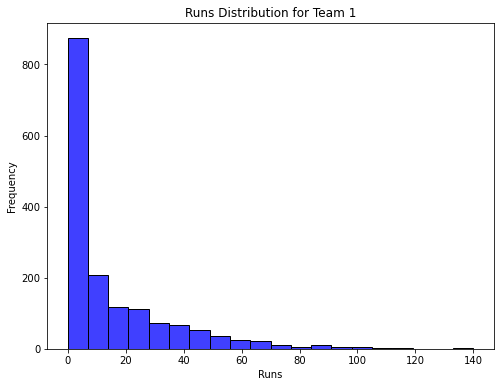

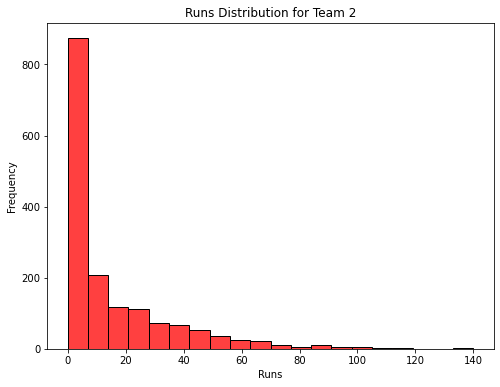

In [22]:
# Plotting histogram for runs scored by team1
plt.figure(figsize=(8, 6))
sns.histplot(df['Runs'], bins=20, color='blue')
plt.title('Runs Distribution for Team 1')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# Plotting histogram for runs scored by team2
plt.figure(figsize=(8, 6))
sns.histplot(df['Runs'], bins=20, color='red')
plt.title('Runs Distribution for Team 2')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# # Plotting boxplot for runs scored by team1 and team2
# plt.figure(figsize=(8, 6))
# sns.boxplot(x='Team', y='Runs', data=pd.concat([team1_df, team2_df]), hue='Team', palette=['blue', 'red'])
# plt.title('Runs Distribution for Team 1 vs Team 2')
# plt.xlabel('Team')
# plt.ylabel('Runs')
# plt.show()

# # Plotting bar chart for total runs by team1 and team2
# plt.figure(figsize=(8, 6))
# total_runs_team1 = team1_df['Runs'].sum()
# total_runs_team2 = team2_df['Runs'].sum()
# sns.barplot(x=['Team 1', 'Team 2'], y=[total_runs_team1, total_runs_team2], palette=['blue', 'red'])
# plt.title('Total Runs by Team 1 vs Team 2')
# plt.xlabel('Team')
# plt.ylabel('Total Runs')
# plt.show()

In [175]:
df = pd.read_csv("merged_all_encoded.csv")
print(df.groupby('Name')['Dismissal'].shift().cumsum())

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
19476    38592.0
19477    38594.0
19478    38596.0
19479    38598.0
19480    38600.0
Name: Dismissal, Length: 19481, dtype: float64


In [13]:
not_out_counts = df.groupby('Name')['Dismissal'].shift().value_counts()
not_out_counts = not_out_counts.loc[(slice(None), 4)]
print(not_out_counts)

IndexingError: Too many indexers

In [338]:
df = merged_df.copy()
df.Dismissal

0        1
1        2
2        2
3        2
4        4
        ..
19402    1
19403    1
19404    1
19405    4
19406    2
Name: Dismissal, Length: 19407, dtype: int64

## Batting Parameters

In [340]:
cum_boundaries = df.groupby('Name')['6s'].shift().cumsum() + df.groupby('Name')['4s'].shift().cumsum()
cum_balls_played = df.groupby('Name')['Balls'].shift().cumsum()
df['Hard_Hitting_ability'] = np.where(cum_balls_played == 0, 0, cum_boundaries / cum_balls_played).round(4)

# Calculate cumulative count of "Not Out" dismissals for each player
dismissals_not_out = df.groupby('Name')['Dismissal'].apply(lambda x: (x ==4 ).shift().cumsum())

# Calculate cumulative count of innings played for each player
innings_played = df.groupby('Name').cumcount() + 1

# Calculate "Finisher - Not Out innings / Total times played" metric
df['Finisher_Not_Out_Innings'] = dismissals_not_out / innings_played
df['Hard_Hitting_ability']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
19402    0.1662
19403    0.1662
19404    0.1663
19405    0.1663
19406    0.1663
Name: Hard_Hitting_ability, Length: 19407, dtype: float64

In [341]:
df['Finisher_Not_Out_Innings']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
19402    0.090164
19403    0.133333
19404         0.0
19405    0.121951
19406    0.113924
Name: Finisher_Not_Out_Innings, Length: 19407, dtype: object

In [349]:
df[['Name','Finisher_Not_Out_Innings']].isnull().sum()

Name                          0
Finisher_Not_Out_Innings    642
dtype: int64